(480, 640)
float32 1100.0 5377.0


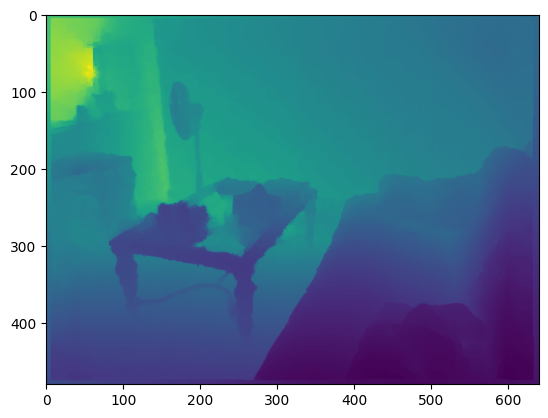

In [8]:
import cv2
import matplotlib.pyplot as plt

gt_path='/media/master/text/cv_data/nyuv2/nyu_data/data/nyu2_test/00605_depth.png'
# gt_path='/media/master/text/cv_data/nyuv2/nyu_data/data/nyu2_train/basement_0001a_out/1.png'
# x=cv2.imread(gt_path, cv2.IMREAD_UNCHANGED).astype("uint16")
x=cv2.imread(gt_path, cv2.IMREAD_UNCHANGED).astype("float32")
print(x.shape)
print(x.dtype, x.min(), x.max())
plt.imshow(x)

In [4]:
import argparse
from nyuv2_torch_ds_adapter import nyudepthv2
data, args = None, argparse.Namespace()
args.truncate_testset = False
# args.target_size = (64, 64)
args.crop_size = (640, 480)
args.target_size = (64, 64)
# args.target_size = (480,640)
args.out_fold_ratio = 1
args.is_maxim = False
nyuv2_ds = nyudepthv2(
            data_path="/media/master/text/cv_data/nyuv2/nyu_data/data",
            filenames_path="/media/master/text/cv_data/nyuv2/nyu_data/data",
            args=args,
            is_train=True,
            crop_size=args.crop_size,
            scale_size=args.target_size,
            fold_ratio=args.out_fold_ratio,
        )

Dataset: NYU Depth V2
# of train images: 50688


In [5]:
import tensorflow as tf

import torch


nyuv2_loader = torch.utils.data.DataLoader(
    nyuv2_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    drop_last=False,
)
def generator():
    # for images, labels in nyuv2_loader:
    for sample in nyuv2_ds:
        # Yield data batch-by-batch
        yield sample
        # yield images.numpy(), labels.numpy()

# Use output_signature to specify the output format and shapes
output_signature = (
    tf.TensorSpec(shape=(64, 64, 3), dtype=tf.float32),
    tf.TensorSpec(shape=(64, 64), dtype=tf.float32)
)

# Create a tf.data.Dataset from generator
tf_dataset = tf.data.Dataset.from_generator(generator, output_signature=output_signature)
x=next(iter(tf_dataset))
x[0].shape, x[1].shape


(TensorShape([64, 64, 3]), TensorShape([64, 64]))

In [14]:
y=next(iter(tf_dataset.shuffle(100).skip(100).batch(2).take(1)))

In [15]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from nyuv2_torch_ds_adapter import nyudepthv2
# Assuming `dataset` is your original PyTorch dataset
dataset=nyudepthv2(
        data_path="/media/master/text/cv_data/nyuv2/nyu_data/data",
        filenames_path="/media/master/text/cv_data/nyuv2/nyu_data/data",
        args=args,
        is_train=True,
        crop_size=args.crop_size,
        scale_size=args.target_size,
        fold_ratio=args.out_fold_ratio,
    )
# Define the size of the validation set
val_size = int(0.2 * len(dataset))  # 20% of the dataset

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [len(dataset) - val_size, val_size])

Dataset: NYU Depth V2
# of train images: 50688


In [16]:
len(train_dataset)

40551

In [7]:
# Define the size of the training and testing subsets (e.g., 80% for training, 20% for testing)
dataset_size = len(nyuv2_ds)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

# Shuffle the dataset
dataset_shuffled = tf_dataset.shuffle(100)

# Split the dataset into train and test subsets
train_dataset = dataset_shuffled.take(train_size)
test_dataset = dataset_shuffled.skip(train_size)

In [10]:
next(iter(train_dataset.batch(2).take(1)))

(<tf.Tensor: shape=(2, 64, 64, 3), dtype=float32, numpy=
 array([[[[251., 251., 251.],
          [251., 255., 255.],
          [252., 255., 255.],
          ...,
          [255., 253., 250.],
          [251., 250., 248.],
          [255., 254., 255.]],
 
         [[255., 253., 255.],
          [140., 143., 156.],
          [142., 150., 172.],
          ...,
          [ 35.,  18.,   4.],
          [ 19.,  16.,   5.],
          [253., 253., 251.]],
 
         [[255., 254., 255.],
          [145., 149., 158.],
          [150., 152., 166.],
          ...,
          [ 33.,  20.,   4.],
          [ 15.,  12.,   5.],
          [255., 253., 250.]],
 
         ...,
 
         [[252., 254., 255.],
          [ 41.,  56.,  88.],
          [ 31.,  34.,  71.],
          ...,
          [ 18.,  22.,   9.],
          [ 18.,  35.,  15.],
          [255., 254., 255.]],
 
         [[251., 254., 255.],
          [ 39.,  60.,  80.],
          [ 59.,  66.,  88.],
          ...,
          [ 14.,  23.,   5.],
